In [3]:
%cd /home/heydar/me/BSC/FinalPorject/lsh

/home/heydar/me/BSC/FinalPorject/lsh


In [4]:
import numpy as np
from time import time

# Loading Dataset
## Preparing Dataset from sickit-learn
In this example our dataset is a news group dataset.

In [5]:
import pandas as pd


In [3]:
data2 = pd.read_csv('/media/heydar/extra2/BSC/LSH_DATASET/Reddit_Big/comments_positive.csv')

In [24]:
data=data2

In [25]:
# data=data[['id','body']]

data=data.loc[data['text'] != '[removed]']
data[['text']]

,text
0,This isn't Twitter: try to comment on the arti...
1,"Well, it is exactly what it sounds like. It's ..."
2,"In soviet Russia, bomb disarms you!"
3,"""runin for senitur! #YOLO!"""
4,You step motherfucker.
...,...
1999995,"yeah man, those things are bad for your health."
1999996,I honestly like this because it asks the other...
1999997,Is... that what you see here?
1999998,Prepare to lose your breakfast. Entire school ...


In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/heydar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/heydar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/heydar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:

def normalize_text(text):
    
    text=str(text)
    text = text.lower()
    words = word_tokenize(text)

    # Remove punctuation and non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    normalized_text = ' '.join(words)
    return normalized_text


In [48]:
normalize_text(part1['text'][0])

'twitter try comment article current activity'

In [49]:
part1=data.iloc[:500000]
part2=data.iloc[500000:1000000]
part3=data.iloc[1000000:1500000]
part4=data.iloc[1500000:2000000]

In [50]:
part1['text']=part1['text'].apply(lambda x : normalize_text(x))

/tmp/ipykernel_44929/1403953296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part1['text']=part1['text'].apply(lambda x : normalize_text(x))


In [51]:
part2['text']=part2['text'].apply(lambda x : normalize_text(x))

/tmp/ipykernel_44929/384413117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part2['text']=part2['text'].apply(lambda x : normalize_text(x))


In [52]:
part3['text']=part3['text'].apply(lambda x : normalize_text(x))

/tmp/ipykernel_44929/2976579892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part3['text']=part3['text'].apply(lambda x : normalize_text(x))


In [53]:
part4['text']=part4['text'].apply(lambda x : normalize_text(x))

/tmp/ipykernel_44929/2701164848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part4['text']=part4['text'].apply(lambda x : normalize_text(x))


In [54]:
pd.concat([part1,part2,part3,part4]).to_csv('/media/heydar/extra2/BSC/LSH_DATASET/Reddit_Big/normalized_positive.csv')

### Do TF-IDF on dataset

In [6]:
data=pd.read_csv('/media/heydar/extra2/BSC/LSH_DATASET/Reddit_Big/normalized_positive.csv')

/home/heydar/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data=data[['text']]

In [8]:
data=data.dropna()

In [9]:
data

,text
0,twitter try comment article current activity
1,well exactly sound like shoebox least whenever...
2,soviet russia bomb disarms
3,runin senitur yolo
4,step motherfucker
...,...
2262320,yeah man thing bad health
2262321,honestly like asks gender opinion pervious top...
2262322,see
2262323,prepare lose breakfast entire school district ...


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    ngram_range=(3,3),
    stop_words="english",
)

In [11]:
t0 = time()
X_tfidf = vectorizer.fit_transform(data.text)

print(f"vectorization done in {time() - t0:.3f} s")

vectorization done in 54.265 s


after adding limit to data some of rows are empty so we need to drop them for better result.

In [12]:
drops_datas=np.where([X_tfidf.getnnz(1)<1])[1]
nnzero_rows=X_tfidf.getnnz(1)>1
X_tfidf=X_tfidf[nnzero_rows]

In [13]:
# Create a copy of the CSR matrix and convert it to a COO matrix
coo_matrix = X_tfidf.tocoo(copy=True)

# Replace non-zero values with their own column indices
coo_matrix.data = coo_matrix.col

# Convert the COO matrix back to CSR format
shingles = coo_matrix.tocsr()


In [24]:
#set Cluster Number
true_k = 100


In [15]:
X_tfidf.shape

(167380, 75931)

In [16]:

from src.LSH.MinHash import MinHash
from src.LSH.lsh import LSH
#Make LSH
prime=75931
lsh_time_start=time()
b, r = 1, 1
num_perm = b * r
minhash = MinHash(num_perm)
mh = minhash.sign_csr_callback_permutation(shingles, shingles.shape[1],prime)
mh = np.array(mh)
print('waiting for Create LSH index')
# Create LSH index
lsh = LSH(b=b, r=r)
lsh.fit(mh)
print('LSH index Created')
lsh_time=time()-lsh_time_start

waiting for Create LSH index
LSH index Created


In [17]:
from collections import defaultdict
from sklearn import metrics
evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X,lsh=None, name=None, n_runs=5,seek_time=0):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.random_state=seed
        t0 = time()
        if lsh:
            km.fit(X,lsh)
        else:
            km.fit(X)
        train_times.append(time()+seek_time - t0)
        scores['inertia'].append(km.inertia_)
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=10000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


In [18]:
from sklearn.cluster import KMeans



In [26]:
init_centroids=KMeans(
    n_clusters=true_k,
    max_iter=1,
    n_init=1,
    init='k-means++'
).fit(X_tfidf).cluster_centers_

In [27]:
from src.Kmeans.mh_kmeans import MHKmeans

mh_kmeas=MHKmeans(
    n_clusters=true_k,
    max_iteration=1,
    n_init=1,
    verbose=True,
    
    init=init_centroids
)
fit_and_evaluate(mh_kmeas, X_tfidf,lsh, name="Mh KMeans random \non  tf-idf vectors", n_runs=1)


Init: initializing centers
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/1, moves: 283, cost: [154284.97786848] in 375.0385172367096 seconds
clustering done in 11774.24 ± 0.00 s 
inertia: 154284.978 ± 0.000
Silhouette Coefficient: 0.072 ± 0.000


In [28]:
from src.Kmeans.kmeans import Kmeans


In [29]:
simple_kmeans = Kmeans(
    n_clusters=true_k,
    max_iteration=1,
    n_init=1,
    verbose=True,
    
    init=init_centroids
)

fit_and_evaluate(simple_kmeans, X_tfidf,None, name="KMeans random \non  tf-idf vectors", n_runs=1)


Init: initializing centers
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/1, moves: 440, cost: [154281.2644663] in 5815.611603975296
clustering done in 17204.37 ± 0.00 s 
inertia: 154281.264 ± 0.000
Silhouette Coefficient: 0.074 ± 0.000


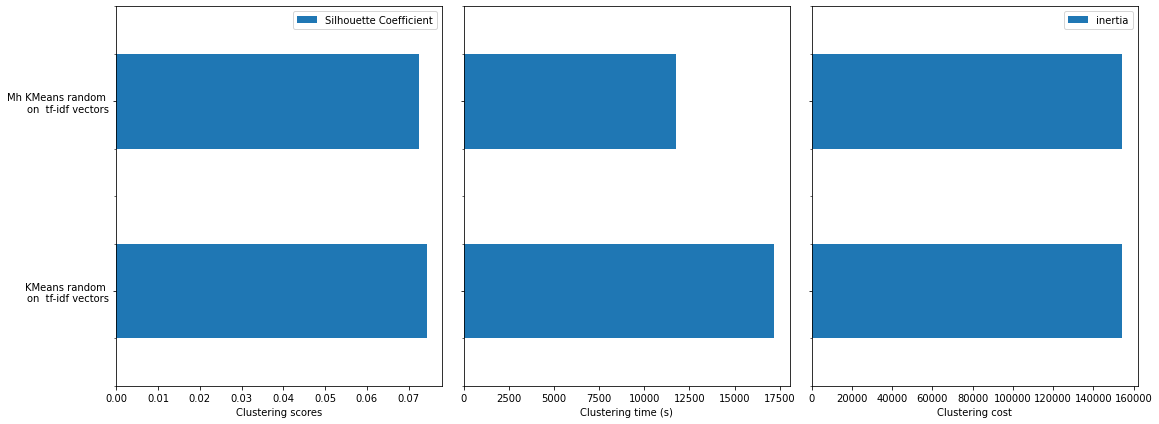

In [30]:


# Plot
import matplotlib.pyplot as plt
import pandas as pd

fig, (ax0, ax1,ax2) = plt.subplots(ncols=3, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.drop(
    ["train_time",'inertia'],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")


df[['inertia']].plot.barh(ax=ax2,xerr=df_std)
ax2.set_xlabel("Clustering cost")
ax2.set_ylabel("")


plt.tight_layout()
plt.savefig("RedditBig_500_1_1Algo2.png")
plt.savefig('RedditBig_500_1_1Algo2.pdf')
plt.show()

